In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gmplot

In [3]:
gps_raw = pd.read_csv('~/xuancong-gps.csv')

In [4]:
gps_raw.head()

,timestamp,latitude,longitude,altitude,accuracy
0,1565086099261,1.520448300854683,-102.34874915566405,111.5999984741211,23.6
1,1565086103339,1.520497850854683,-102.34886152566406,64.83892822265625,23.584
2,timestamp,latitude,longitude,altitude,accuracy
3,timestamp,latitude,longitude,altitude,accuracy
4,timestamp,latitude,longitude,altitude,accuracy


In [5]:
gps_data = gps_raw[gps_raw.timestamp != 'timestamp']

for col in gps_data.columns:
    gps_data[col] = pd.to_numeric(gps_data[col])

In [6]:
gps_data.dtypes

timestamp      int64
latitude     float64
longitude    float64
altitude     float64
accuracy     float64
dtype: object

In [7]:
gps_data = gps_data.tail(1646)

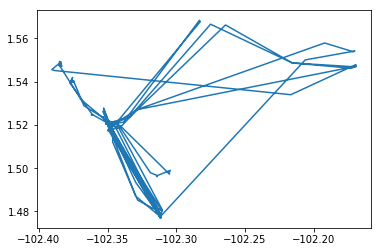

In [8]:
plt.plot(gps_data['longitude'], gps_data['latitude'])


# Connect to Google Maps

In [9]:
min_lon = float(min(gps_data['longitude']))
max_lon = float(max(gps_data['longitude']))
min_lat = float(min(gps_data['latitude']))
max_lat = float(max(gps_data['latitude']))

## Create empty map with zoom level 16
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2, 
                        min_lon + (max_lon - min_lon) / 2,  16)

mymap.plot(gps_data['latitude'], gps_data['longitude'], 'blue', edge_width=1)
mymap.draw('my_gm_plot.html')

In [10]:
# How many places I have visited